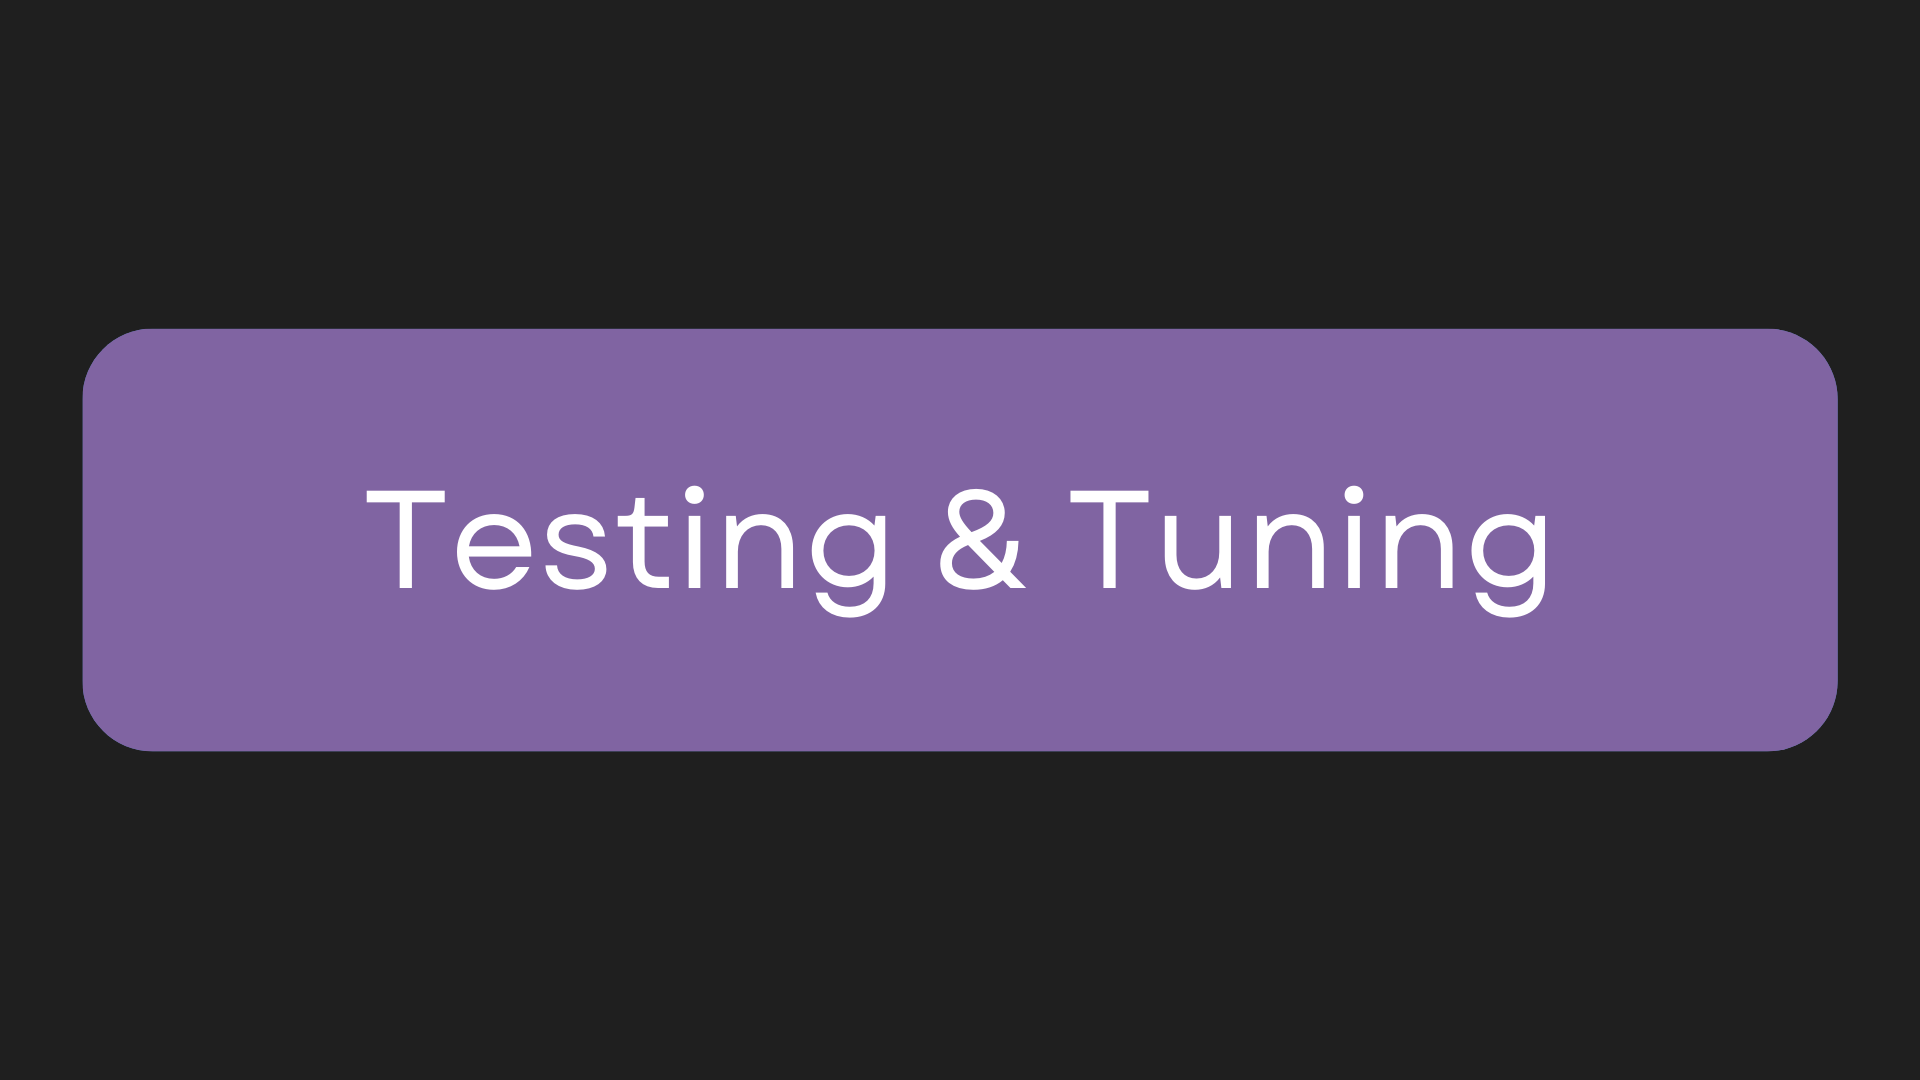

Finally, test some sample images using our model. Congrats, you finished creating a multimodal image captioning model!

In [ ]:
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from preprocess import get_loader

def test_specific_images(model_path, image_folder, dataset_path, captions_file, device):
    """    
    Args to remember:
        model_path: Path to the trained model
        image_folder: Folder containing test images
        dataset_path: Path to the original dataset (to get the vocabulary)
        captions_file: Original captions file path
        device: Device to run inference on
    """
    # Load the model
    model = torch.load(model_path)
    model.eval()
    model.to(device)
    
    # Define image preprocessing (same as training)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    # Get the dataset (just to access the vocabulary)
    _, dataset = get_loader(
        root_dir=dataset_path,
        captions_file=captions_file,
        transform=transform,
        batch_size=1  # Doesn't matter here
    )
    
    # Access the vocabulary from the dataset
    vocab = dataset.vocab
    
    # Process each image in the folder
    for filename in ['boy.png', 'boat.png', 'dog.jpg', 'horse.png', 'biker.jpg', 'man_bench.jpg']:
            # Load and process image
            img_path = os.path.join(image_folder, filename)
            image = Image.open(img_path).convert("RGB")
            image_tensor = transform(image).unsqueeze(0).to(device)
            
            # Generate caption
            generated_caption = model.caption_image(image_tensor, vocab)
            caption_text = " ".join(generated_caption)
            
            # Display results
            print(f"Image: {filename}")
            print(f"Caption: {caption_text}")
            print("-" * 50)
            
            # Optionally save the captioned image
            plt.figure(figsize=(8, 8))
            plt.imshow(image)
            plt.title(caption_text)
            plt.axis('off')
            plt.savefig(os.path.join(image_folder, f"captioned_{filename}"))
            plt.close()

if __name__ == "__main__":
    # Parameters
    model_path = "checkpoints/best_model.pt"
    test_image_folder = "test_images"  # Folder with your 4 test images
    dataset_path = "data/images/"  # Original training images path
    captions_file = "data/text.csv"  # Original captions file
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Run test
    test_specific_images(model_path, test_image_folder, dataset_path, captions_file, device)